In [36]:
import cv2
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [44]:
def possible_objects(img):
    #copy image
    imOut = img.copy()
    # resize image
    newHeight = 200
    newWidth = int(imOut.shape[1]*200/imOut.shape[0])
    imOut = cv2.resize(imOut, (newWidth, newHeight))
    # create Selective Search Segmentation Object using default parameters
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    # set input image on which we will run segmentation
    ss.setBaseImage(imOut)
    # Switch to slow but high recall Selective Search method
    # ss.switchToSelectiveSearchFast()
    ss.switchToSelectiveSearchQuality()
    # run selective search segmentation on input image
    rects = ss.process()
    # multiply the coordinates of the bounding boxes by the scale factor
    scale_factor_x = img.shape[1]/imOut.shape[1]
    scale_factor_y = img.shape[0]/imOut.shape[0]
    # create list of bboxes
    bboxes = []
    # iterate over all the region proposals
    for i, rect in enumerate(rects):
        # draw rectangle for region proposal
        x, y, w, h = rect
        x, y, w, h = round(x*scale_factor_x), round(y*scale_factor_y), round(w*scale_factor_x), round(h*scale_factor_y)
        bboxes.append([x, y, w, h])
    return bboxes

def show_boxes(img, boxes):
    # copy image
    imOut = img.copy()
    # iterate over all the region proposals
    for rect in boxes:
        # draw rectangle for region proposal till 100
        x, y, w, h = rect
        cv2.rectangle(imOut, (x, y), (x+w, y+h), (255, 0, 0), 1, cv2.LINE_AA)
    # show output
    plt.imshow(imOut)

def IoU(b1, b2):
    i1, j1, h1, l1 = b1
    i2, j2, h2, l2 = b2
    x1 = max(i1, i2)
    y1 = max(j1, j2)
    x2 = min(i1 + h1, i2 + h2)
    y2 = min(j1 + l1, j2 + l2)
    if x1 > x2 or y1 > y2:
        return 0
    else:
        return (x2 - x1) * (y2 - y1) / (h1 * l1 + h2 * l2 - (x2 - x1) * (y2 - y1))

In [42]:
# show_boxes(im, )
boxes = possible_objects(cv2.imread("data/images/pos/abigotte_pos_001.jpg"))

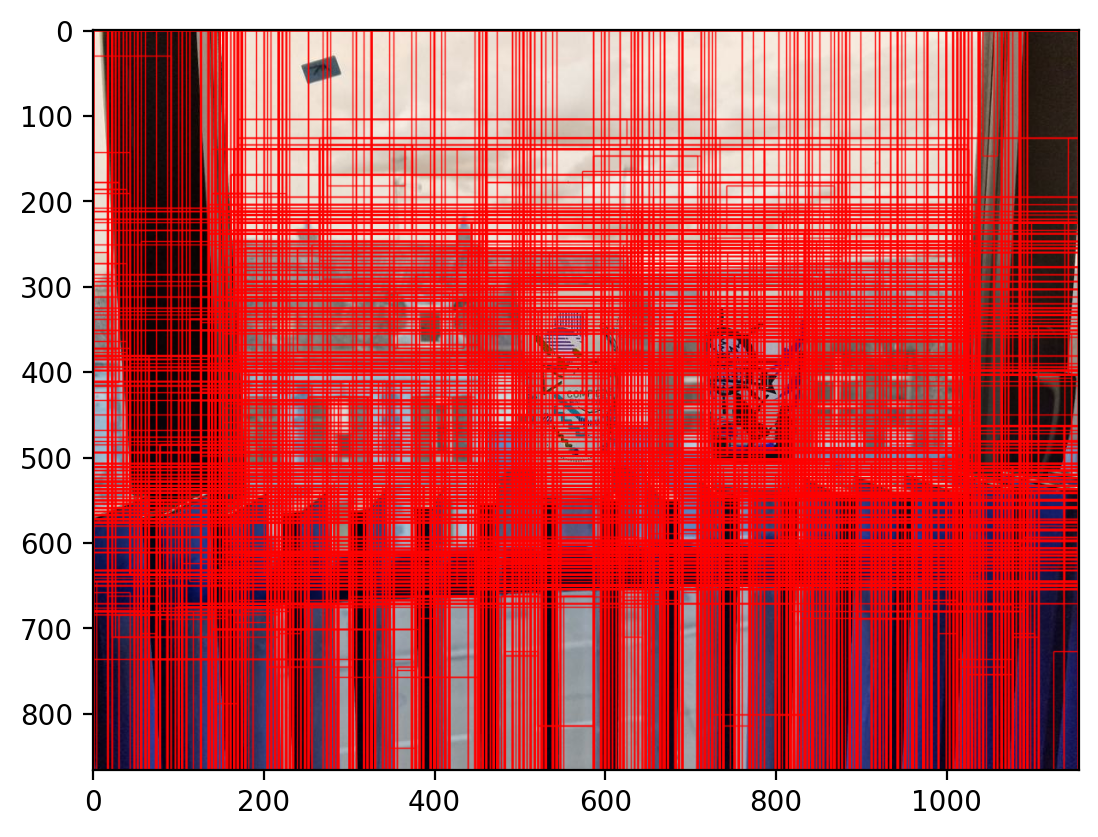

In [43]:
show_boxes(cv2.imread("data/images/pos/abigotte_pos_001.jpg"), boxes)

In [45]:
# remove boxes with IoU > 0.5
def remove_overlapping_boxes(boxes):
    # create list of bboxes
    bboxes = []
    # iterate over all the region proposals
    for i, rect in enumerate(boxes):
        # draw rectangle for region proposal
        x, y, w, h = rect
        # check if there is an overlap with a previous box
        overlap = False
        for j in range(i):
            if IoU(rect, boxes[j]) > 0.5:
                overlap = True
                break
        if not overlap:
            bboxes.append([x, y, w, h])
    return bboxes

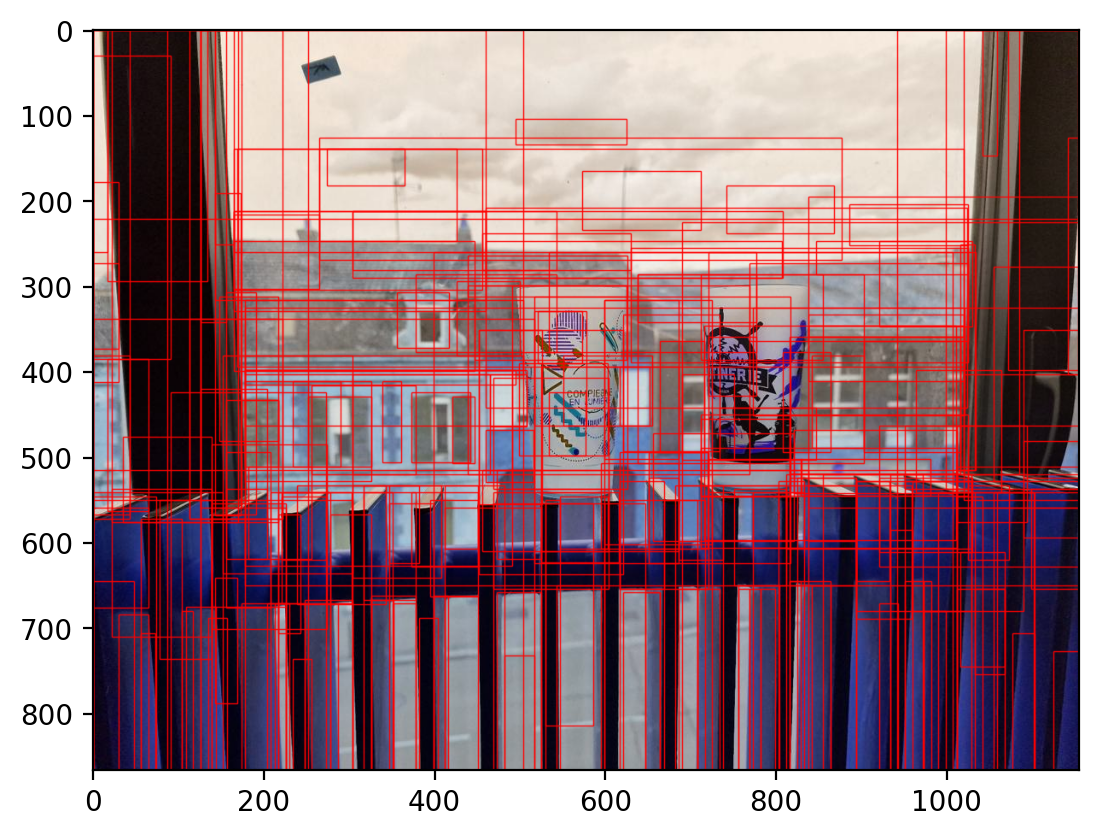

In [46]:
show_boxes(cv2.imread("data/images/pos/abigotte_pos_001.jpg"), remove_overlapping_boxes(boxes))